Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Laboratorijska vježba 2: Regresija i perceptron

(c) 2015 Jan Šnajder

*Verzija 0.2*

Objavljeno: **10. studenog 2015.**<br>
Rok za predaju: **16-20. studenog 2015.**

Ivan Jurin 0036470417

## Upute

Laboratorijska vježba 2 sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne bi samo čitali).

Osigurajte da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Univarijatna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = sp.array([[0],[1],[2],[4]])
y = sp.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz bilbioteke sklearn i upotrijebite je za generiranje dizajn-matrice $\mathbf{\Phi}$ sa $m=n$. Drugim riječima, generirajte dizajn-matricu bez preslikavanja u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

polf = PolynomialFeatures(1)

phi = polf.fit_transform(X)
print phi

[[1 0]
 [1 1]
 [1 2]
 [1 4]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ dizajn-matrice, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from scipy import linalg

w = np.linalg.inv(phi.transpose().dot(phi)).dot(phi.transpose()).dot(y)
print w
print linalg.pinv(phi).dot(y)

[ 2.2         0.45714286]
[ 2.2         0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N({\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

4.08571428571


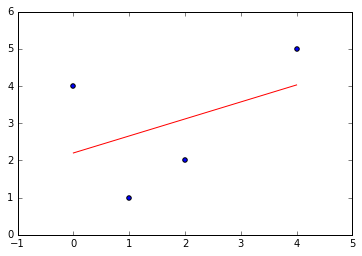

In [5]:
from sklearn.metrics import mean_squared_error as mse

plt.scatter(X,y)
plt.plot(X,np.polyval(np.flipud(w),X),color="red")

print mse(y,phi.dot(w)) * len(X)/2

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadrante pogreške nisu posve identične. U čemu je razlika? Koja je funkcija korisnija u praksi? Zašto?

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

In [6]:
try:
    inv = inv(phi)
except LinAlgError:
    print ":("

:(


**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću metoda `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X,y)

print lr.intercept_
print lr.coef_

print mse(y,lr.predict(X)) * len(X)/2

2.2
[ 0.45714286]
4.08571428571


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$.

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

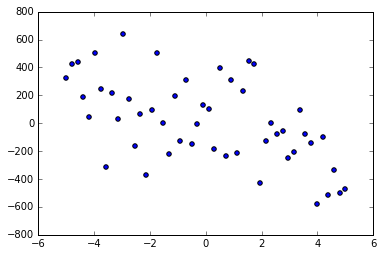

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    return f(X) + normal(0,noise,len(X))

f = lambda x: 5 + x - 2 *x*x-5*x*x*x

X = np.linspace(-5,5,50)
Y = make_labels(X,f,200)
#plt.plot(X,f(X),color='red')
plt.scatter(X,Y);

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

13869.9666782


/usr/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


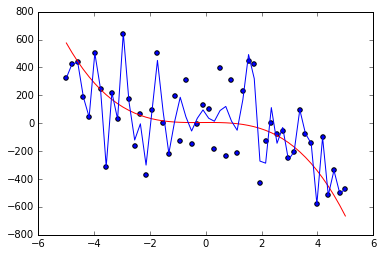

In [27]:
pf = np.polyfit(X,Y,100)

#print pf

plt.plot(X,f(X),color='red')
plt.scatter(X,Y);
plt.plot(X,np.polyval(pf,X));

print mse(Y,np.polyval(pf,X))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

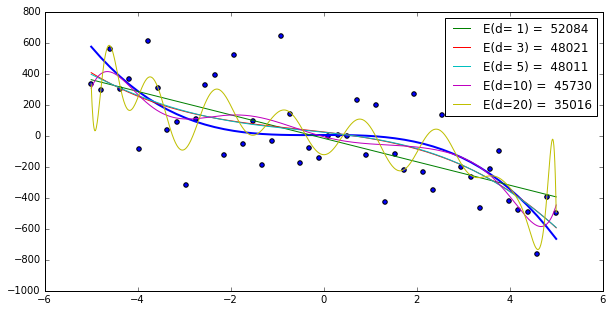

In [45]:
plt.figure(figsize=(10,5))

plt.plot(X,f(X),linewidth=2)
plt.scatter(X,Y)
lspce = linspace(-5,5,1000)

def error(x,y,pf):
    return mse(y,np.polyval(pf,x))

for d in [1,3,5,10,20]:
    pf = np.polyfit(X,Y,d)
    plt.plot(lspce,np.polyval(pf,lspce),label="E(d={0:2d}) = {1:6.0f}".format(d,error(X,Y,pf)))
plt.legend(loc="best");

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in\{1,20\}$. Radi preciznosti, funkcije $h(\mathbf{x})$ iscrtajte na cijelom skupu primjera (ali pogrešku generalizacije računajte, naravno, samo na ispitnome skupu). Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

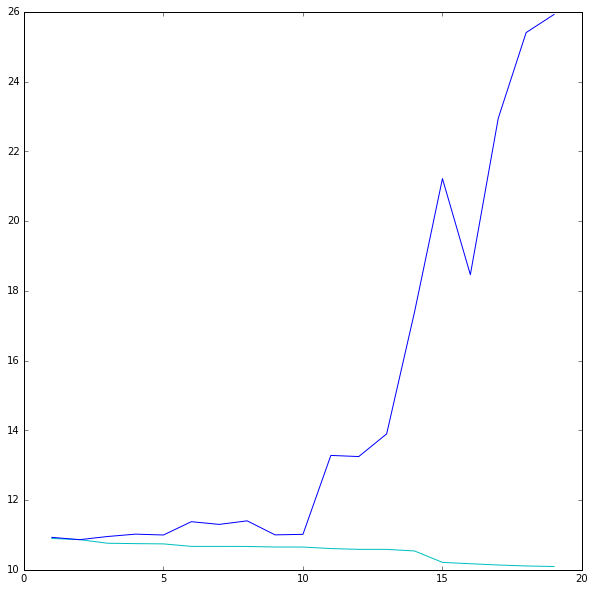

In [46]:
from sklearn.cross_validation import train_test_split
plt.figure(figsize=(10,10))

d_domain = np.arange(1,20)

Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,Y,test_size=0.5)
def plot_test_train(Xtrain, Xtest, Ytrain, Ytest, plot):
    polyfits = map(lambda x:np.polyfit(Xtrain,Ytrain,x),d_domain)

    for (xx,yy),c in zip(zip([Xtrain,Xtest],[Ytrain,Ytest]),'cb'):
        errors = map(lambda x: np.log(error(xx,yy,x)),polyfits)
        plot.plot(d_domain,errors,color=c)

plot_test_train(Xtrain, Xtest, Ytrain, Ytest, plt)

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

### (c)

Problem s prethodnim eksperimentom jest stohastičnost koja je posljedica slučajne podjele primjera na primjere za učenje i primjere za ispitivanje. Jedan način da se to zaobiđe jest da se fiksira podjela skupa primjere. To, međutim, uvodi proizvoljnost i ne daje pouzdanu procjenu pogreške. Bolje rješenje jest ponoviti izračun više puta s različitim podjelama skupa podataka i zatim uprosječiti vrijednosti pogreške za svaki model. Definirajte funkciju `plot_poly_regression_errors(X, degrees, ratio=0.5, repeat=30)` koja radi upravo to: funkcija uzima matricu primjera `X` i vektor oznaka `y`, dijeli ih na skup za učenje i skup za ispitivanje u omjeru `ratio` (udio skupa za ispitivanje) te trenira polinomijalne regresijske modele svih stupnjeva iz liste `degrees`, i to svaki `repeat` puta, te prikazuje grafikon uprosječenih logaritama pogrešaka.

**NB:**  Kako biste osigurali ponovljivost eksperimenta, generator pseudoslučajnih brojeva incijalizirajte nekom odabranom vrijednošću. Pritom osigurajte da svako ponavljanje eksperimenata ipak bude različito, ali da cjelokupan eksperiment bude ponovljiv.

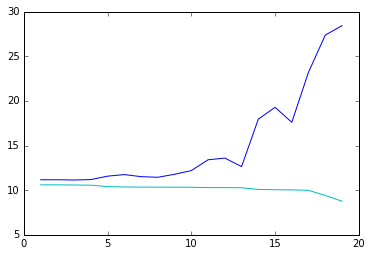

In [47]:
def plot_poly_regression_errors(X, degrees, ratio=0.5, repeat=30):
    errorsTrain =np.zeros(19)
    errorsTest=np.zeros(19)
    
    for i in range(repeat):
        Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,degrees,test_size=ratio,random_state=69)
        polyfits = map(lambda x:np.polyfit(Xtrain,Ytrain,x),d_domain)
        errorsTrain += map(lambda x: np.log(error(Xtrain,Ytrain,x)),polyfits)
        errorsTest += map(lambda x: np.log(error(Xtest,Ytest,x)),polyfits)
    
    plt.plot(d_domain,errorsTrain/repeat,color='c')
    plt.plot(d_domain,errorsTest/repeat,color='b')
    
plot_poly_regression_errors(X,Y)

### (d)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera), zatim generirajte tri parova skupova za učenje i ispitivanje, svaki s različitom količinom šuma. Naposlijetku iz tih skupova izdvojite dodatne podskupove od $N=200$ primjera ($100$ za učenje i $100$ za ispitivanje) i $N=100$ primjera ($50$ za učenje i $50$ za ispitivanje).

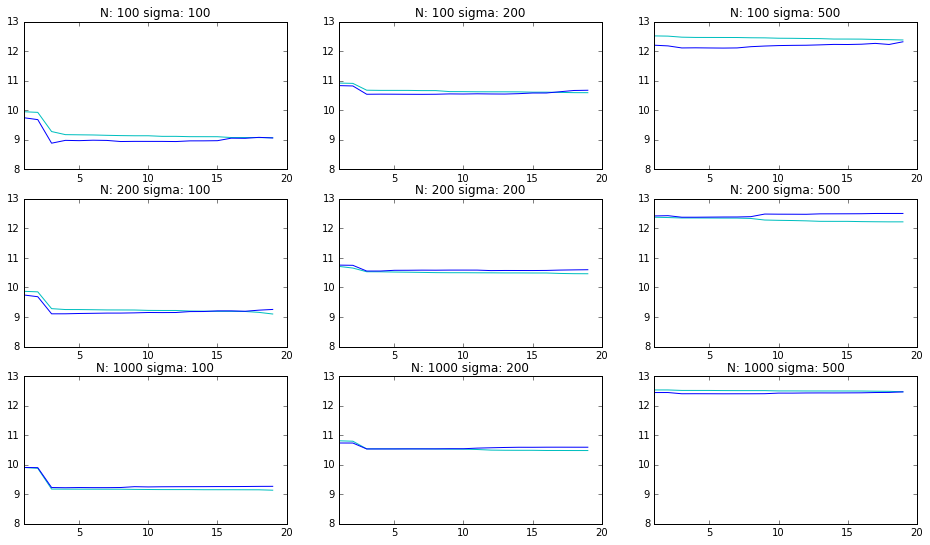

In [48]:
X = linspace(-5,5,1000)
Xtrain, Xtest, _, _ =train_test_split(X, X,test_size=0.5)

fig = plt.figure(figsize=(16,9))

for k,(N,sigma) in enumerate(itertools.product([100,200,1000],[100,200,500])):
    splt = fig.add_subplot(3,3,k+1)
    splt.axis([1,20,8,13])
    plot_test_train(Xtrain[:N], Xtest[:N], make_labels(Xtrain[:N],f,sigma), make_labels(Xtest[:N],f,sigma), splt)
    splt.set_title("N: "+str(N)+" sigma: "+str(sigma))

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

In [49]:
X = sp.array([[0],[1],[2],[4]])
y = sp.array([4,1,2,5])

polf = PolynomialFeatures(3)
phi = polf.fit_transform(X)

def calculateW(phi,y,l):
    idd = np.identity(len(phi[0]))
    idd[0,0] = 0
    return np.linalg.inv(phi.transpose().dot(phi)+idd*l).dot(phi.transpose()).dot(y)
    
for l in [0,1,10]:
    print calculateW(phi,y,l)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (metode `coef_` i `intercept_`).

In [50]:
from sklearn.linear_model import Ridge

for l in [0,1,10]:
    rdg = Ridge(alpha=l)
    rdg.fit(phi,y)
    rdg.coef_[0] = rdg.intercept_
    print rdg.coef_

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako te popravite izračun u zadatku 4a tako da težine budu identične ovima u zadatku 4b.

### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

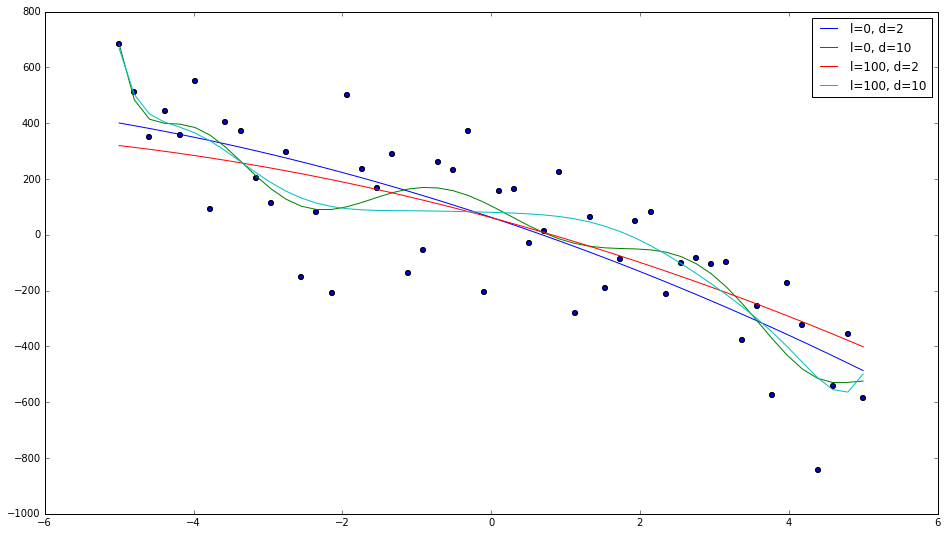

In [51]:
X = np.linspace(-5,5,50)
Y = make_labels(X,f,200)

fig = plt.figure(figsize=(16,9))

for l,d in itertools.product([0,100],[2,10]):
    phi = PolynomialFeatures(d).fit_transform(X[:, np.newaxis])
    
    rdg = Ridge(alpha=l)
    rdg.fit(phi,Y)
    
    plt.scatter(X,Y)
    plt.plot(X,rdg.predict(phi),label="l={0}, d={1}".format(l,d))

plt.legend(loc="best");

**Q:** Jesu li rezultati očekivani? Obrazložite.

**Q:** Za koji od ovih četiri modela biste očekivali da će najbolje generalizirati?

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=20,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

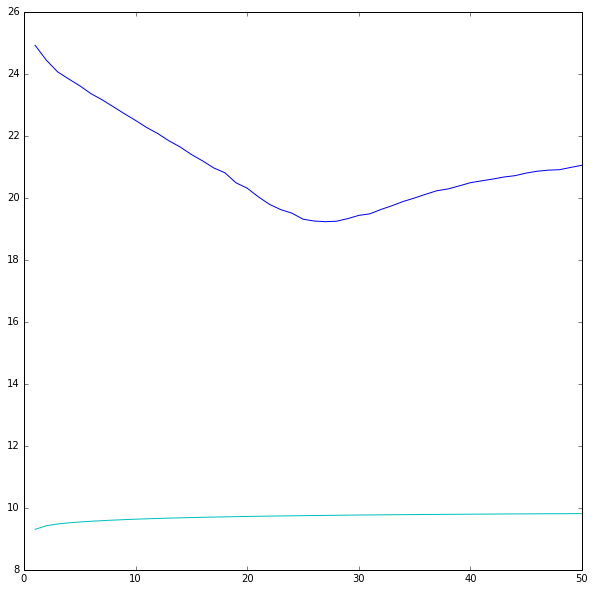

In [52]:
plt.figure(figsize=(10,10))

Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,Y,test_size=0.5)

phi = PolynomialFeatures(20).fit_transform(Xtrain[:, np.newaxis])
l_domain = xrange(1,51)
ridges = map(lambda l: Ridge(alpha=l).fit(phi,Ytrain),l_domain)

for (xx,yy),c in zip(zip([Xtrain,Xtest],[Ytrain,Ytest]),'cb'):
    errors = map(lambda rdg: np.log(mse(yy,rdg.predict(PolynomialFeatures(20).fit_transform(xx[:, np.newaxis])))), ridges)
    plt.plot(l_domain,errors,color=c) 


**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti a kojoj podnaučenosti. Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?

**Q:** Jesu li rezultati stabilni? Zašto?

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcija:

In [18]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[sp.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=20$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$.

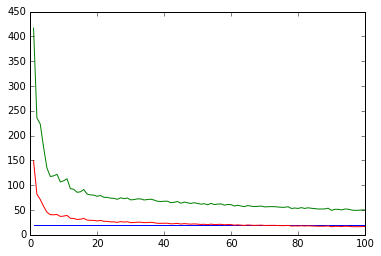

20


In [19]:
from sklearn.linear_model import Ridge

from numpy.random import normal

Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,Y,test_size=0.5)

def f(x):
    return 5 + x - 2 *x*x-5*x*x*x

X = np.linspace(-5,5,50)
Y = make_labels(X,f,200)

l0 = []
l1 = []
l2 = []
lambdas = xrange(1,101)

for l in lambdas:

    polif = PolynomialFeatures(20)

    phi = polif.fit_transform(Xtrain[:, np.newaxis])

    rdg = Ridge(alpha = l)
    rdg.fit(phi,Ytrain)
    
    l0.append(nonzeroes(rdg.coef_))
    l1.append(sum(map(np.abs,rdg.coef_)))
    l2.append(np.sqrt(sum(map(lambda x: x*x,rdg.coef_))))

l0 = np.array(l0)
l1 = np.array(l1)
l2 = np.array(l2)
    

plt.plot(lambdas,l0)
plt.plot(lambdas,l1)
plt.plot(lambdas,l2)
plt.show()

print l0[99]

    

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/usr/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


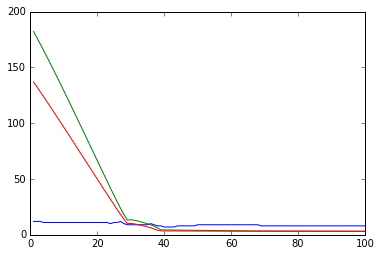

8


In [20]:
from sklearn.linear_model import Lasso


from numpy.random import normal


l0 = []
l1 = []
l2 = []
lambdas = xrange(1,101)

for l in lambdas:

    polif = PolynomialFeatures(20)

    phi = polif.fit_transform(Xtrain[:, np.newaxis])

    rdg = Lasso(alpha = l)
    rdg.fit(phi,Ytrain)
        
    l0.append(nonzeroes(rdg.coef_))
    l1.append(sum(map(lambda x: np.abs(x),rdg.coef_)))
    l2.append(np.sqrt(sum(map(lambda x: x*x,rdg.coef_))))

l0 = np.array(l0)
l1 = np.array(l1)
l2 = np.array(l2)
    

plt.plot(lambdas,l0)
plt.plot(lambdas,l1)
plt.plot(lambdas,l2)
plt.show()

print l0[99]

    

**Q:** Kojem biste modelu (Ridge ili LASSO) u praksi dali prednost, i zašto? U kojim situacijama je ta prednost osobito izražena?

### *7. Predviđanje cijena nekretnina u Bostonu

<span style="color:green">(Rješavanje ovog zadatka nije obavezno, ali donosi dodatne bodove.)</span>

Do sada smo razmatrali isključivo univarijatnu regresiju, tj. imali smo samo jednu značajku ($n=1$). U većini stvarnih problema baratamo s većim brojem značajki. Razmotrimo sada jedan nešto realniji problem, kod kojega postoji više značajki, pa je potrebno napraviti multivarijatnu regresiju.

Učitajte skup podataka *Boston House Prices*:

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.data.shape
print boston.target.shape

(506, 13)
(506,)


Skup sadrži 506 primjera sa 13 numeričkih značajki. Opis skupa možete dobiti na sljedeći način:

In [22]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### (a)

Vaš je zadatak da izgradite regresijski model za predviđanje cijene nekretnine (`y=boston.target`) na temelju 13 raspoloživih značajki za svaku nekretninu (`X=boston.data`). Cilj je pronaći najbolji mogući linearni model regresije na ovom skupu podataka i provjeriti njegovu točnost u smislu pogreške kvadratnog odstupanja ([`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)). 

Hiperparametri modela koje treba isprobati su:

* **Regularizacija:** Bez regularizacije ([`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)), L2-regularizacija ([`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)) i L1-regularizacija ([`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso));
* **Značajke:** Izvornih 13 značajki, polinomijalne značajke (isprobajte različite stupnjeve polinoma $d$), samo interakcijske značajke (opcija `interaction_only` u klasi [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html));
* **Predobrada značajki:** Izvorne vrijednosti značajki ili standardizirane vrijednosti. Standardizacija je postupak skaliranja vrijednosti na distribuciju $\mathcal{N}(0,1)$; v. [standard score](http://en.wikipedia.org/wiki/Standard_score). Koristite funkciju [`preprocessing.scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale).

Kao i inače, za odabir i ispitivanje modela koristit ćemo **unakrsnu provjeru** (engl. *cross-validation*). Skup primjera za učenje podijelit ćemo na **skup za učenje**, **skup za provjeru** i **skup za ispitivanje** u omjeru (otprilike) 3:1:1. Kao u uvijek, model trebate trenirati na skupu za učenje, odabir modela (odnosno optimizaciju hiperparametra) trebate provesti na skupu za provjeru, a konačno vrednovanje modela trebate načiniti na skupu za ispitivanje. Konačno vrednovanje radite samo jednom, za model koji ste na skupu za provjeru odabrali kao optimalan.

**NB:** Nakon što odaberete optimalan model na skupu za provjeru, prije konačnog ispitivanje odabrani model ponovno trenirajte na uniji skupova za učenje i ispitivanje. Na taj način iskorištavate maksimalno iskorištavate dostupne podatke i model će u pravilu biti bolji.

Podjela na skup za učenje, provjeru i ispitivanje u ovom je slučaju fiksna kako bi svi imali identične skupove i kako bi rezultati bili usporedivi. (U stvarnosti biste ovakav eksperiment radili malo drugačije: koristili biste višestruku unakrsnu provjeru ili ugnježđenu unakrsnu provjeru. Više o tome reći ćemo u četvrtoj laboratorijskoj vježbi.) 

Koristite sljedeće skupove:

In [23]:
from sklearn import cross_validation
X_train, X_rest, y_train, y_rest = cross_validation.train_test_split(boston.data,boston.target,train_size=0.6,random_state=42)
X_validate, X_test, y_validate, y_test = cross_validation.train_test_split(X_rest,y_rest,test_size=0.5,random_state=42)
print X_train.shape, X_validate.shape ,X_test.shape

(303, 13) (101, 13) (102, 13)


In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score

ultimateModel = None
ultimateValidationMSE = float("inf")
ultimateTestMSE = None
ultimatePolyf = None

for d in [1,2]:
    print d
    for interaction in [True, False]:
        polyf = PolynomialFeatures(d,interaction_only=interaction)
        phiTrain = polyf.fit_transform(X_train)
        phiValidate = polyf.fit_transform(X_validate)
        phiTest = polyf.fit_transform(X_test)
        for normalize in [True,False]:
            
            linearRegressionModel = LinearRegression(normalize=normalize)
            linearRegressionModel.fit(phiTrain,y_train)
            
            mse_val = mse(y_validate,linearRegressionModel.predict(phiValidate))
            
            if mse_val<ultimateValidationMSE:
                ultimateValidationMSE = mse_val
                ultimateModel = linearRegressionModel
                ultimateTestMSE = mse(y_test,linearRegressionModel.predict(phiTest))
                ultimatePolyf = polyf
                #print mse_val,ultimateTestMSE, interaction

            for l in logspace(1,4,100) + [1]:
                for modelType in [Lasso, Ridge]:
                    model = modelType(normalize=normalize,alpha=l)
                    model.fit(phiTrain,y_train)
                    
                    mse_val = mse(y_validate,model.predict(phiValidate))

                    if mse_val<ultimateValidationMSE:
                        ultimateValidationMSE = mse_val
                        phiTrainValidate = PolynomialFeatures(d,interaction_only=interaction).fit_transform(np.vstack((X_train,X_validate)))
                        ultimateModel = model.fit(phiTrainValidate,list(y_train)+list(y_validate))
                        ultimateTestMSE = mse(y_test,model.predict(phiTest))
                        ultimatePolyf = polyf
                        #print mse_val,ultimateTestMSE, l, interaction

                        
print ultimateValidationMSE
print ultimateModel
print np.sqrt(ultimateTestMSE)

1
2
10.3952509169
Ridge(alpha=6136.907273413176, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)
3.86443898692


**Q:** Koliko značajki ima svaki od modela koji ste isprobali?

**Q:** Koliko je zapravo dobar model koji ste trenirali? Bi li model bio dovoljno dobar za stvarnu uporabu? Možete li to odlučiti na temelju mjere srednjeg kvadratnog odstupanja, ili bi neki drugi pokazatelj bio korisniji?

**Q:** Provjerite točnost odabranog modela na (1) skupu za učenje, (2) skupu za provjeru, (3) uniji ta dva skupa i (4) skupu za ispitivanje. Jesu li odnosi između točnosti modela na ova četiri skupa očekivana? Obrazložite.

**Q:** Kod treniranja regresijskog modela moguće je postaviti `fit_intercept=False`, čime se izbjegava optimiranje težine $w_0$. Trenirajte odabrani model s tom postavkom. Usporedite s točnošću optimalnog modela. Je li rezultat očekivan? Obrazložite. Ima li predobrada značajki ikakvog utjecaja na ovu razliku?

In [54]:
print average(boston.target)
print std(boston.target)*2
print sqrt(ultimateTestMSE)
print sqrt(ultimateTestMSE)/std(boston.target)/2

22.5328063241
18.3760230906
3.86443898692
0.21029789568


### (b)

Magnitude težina $w_i$ upućuju na važnost odgovarajućih značajki $x_i$ u modelu. Načinite jednostavnu analizu značajki tako da ispišete rang-liste značajki s obzirom na težine. Analizu provedite nad modelom koji se u prethodnome zadatku pokazao optimalnim, tj. nad modelom koji ste u konačnici ispitivali.

In [26]:
#rdg = Ridge(alpha=6136.907273413176, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, solver='auto', tol=0.001)
phi = ultimatePolyf.fit_transform(np.eye(len(X_train[0]))*2)
best = sorted(enumerate(np.abs(ultimateModel.coef_)),key=lambda x:-x[1])[:8]
print best
bests = map(lambda x:x[0],best)
i =0
for p in phi:
    for best in bests:
        if p[best] >0:
            print i,"=",boston.feature_names[i],"x^"+str(int(np.log(p[best])/np.log(2)))
    i+=1



[(90, 0.075770850400110071), (69, 0.062924818281276593), (31, 0.056035331225653469), (84, 0.053529286221818205), (47, 0.050280620481537412), (92, 0.037715926259475646), (72, 0.033555917302831896), (49, 0.033439227626021861)]
5 = RM x^2
7 = DIS x^2
8 = RAD x^2


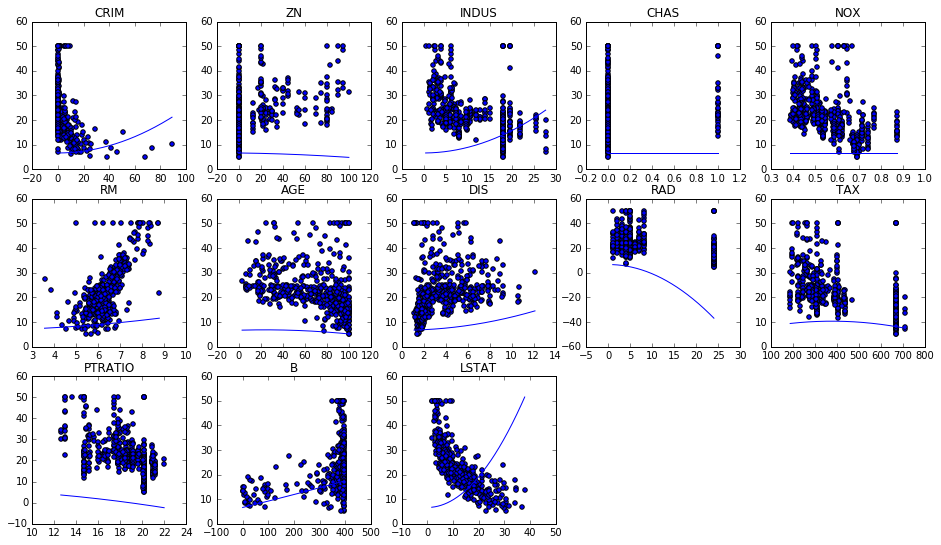

In [27]:
fig = plt.figure(figsize=(16,9))
n = len(boston.feature_names)
zer = np.zeros((len(boston.data),n))

for k in range(n):
    splt = fig.add_subplot(n/5+1,5,k+1)
    #splt.axis([1,20,8,13])
    dat = boston.data[:,k]
    
    v = linspace(np.amin(dat),np.amax(dat),len(zer))[:,np.newaxis]
    phi = ultimatePolyf.fit_transform(np.hstack((zer[:,:k],v,zer[:,k+1:])))
    splt.plot(v,ultimateModel.predict(phi))
    
    splt.scatter(dat, boston.target)
    splt.set_title(boston.feature_names[k])

**Q**: Koje su top-3 značajke modela? Je li to očekivano? Obrazložite.

**Q**: Kakve rezultate očekujete da biste dobili kada biste model trenirali samo s tih prvih tri značajki?

### 8. Linearna regresija kao klasifikator

U nastavku vježbe bavimo se problemom **klasifikacije**.

Klasifikacijske algoritme analizirat ćemo na skupu podataka `seven`, linearno odvojivom skupu podataka od $N=7$ primjera u $n=2$ dimenzije:

In [28]:
seven_X = sp.array([[2,1],[2,3],[1,2],[3,2],[5,2],[5,4],[6,3]])
seven_y = sp.array([1,1,1,1,-1,-1,-1])

Funkcija za vizualizaciju skupa podataka i granice između klasa (ako je zadana funkcija predikcije `h`):

In [29]:
def plot_problem(X, y, h=None, surfaces=True) :
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision boundaries (surfaces=False) or decision surfaces (surfaces=True)
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if shape(Z_test) == () :
                # h returns a scalar when applied to a matrix; map explicitly
                Z = sp.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = sp.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if surfaces :
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        else :
            plt.contour(xx, yy, Z)
    # Plot the dataset
    scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired,marker='o',s=50);


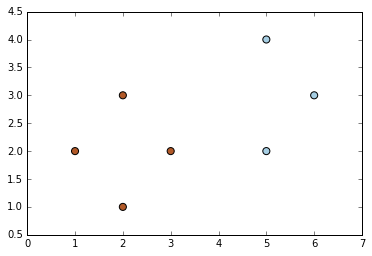

In [30]:
plot_problem(seven_X,seven_y)

Linearna regresija može se upotrijebiti za klasifikaciju tako da se nauči funkcija $f(\mathbf{x})=+1$ za pozitivne primjere i $f(\mathbf{x})=-1$ za negativne primjere. Granica između klasa u tom slučaju bit će funkcija $h(\mathbf{x})=0$, tj. primjeri za koje $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, a ostali kao negativni.  

### (a)

Trenirajte model [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) na skupu `seven`, ispišite težine modela te prikažite primjere i granicu između klasa. Funkciju za predikciju, koju predajete kao treći argument funkcije `plot_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

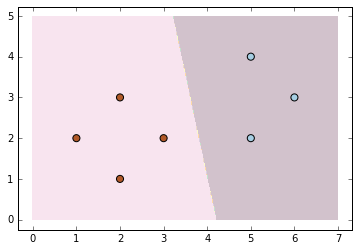

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(seven_X,seven_y)

plot_problem(seven_X,seven_y, lambda x : model.predict(x) >= 0)


**Q:** Ako bismo kao oznake umjesto $\{+1,-1\}$ koristili $\{1,0\}$, kako biste izračunali granicu između klasa?

Klasifikacija pomoću linearne regresije implementirana je u klasi [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). Pokažite da ta implementacija daje iste rezultate na skupu `seven` (pritom isključite regularizaciju, tj. postavite `alpha=0`).

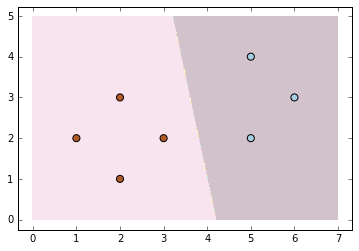

In [32]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier(alpha=0)
model.fit(seven_X,seven_y)

plot_problem(seven_X,seven_y, lambda x : model.predict(x) >= 0)


### (b)

Trenirajte klasifikacijski model `RidgeClassifier` na sljedećem skupu podataka (skup `seven` proširen jednim primjerom):

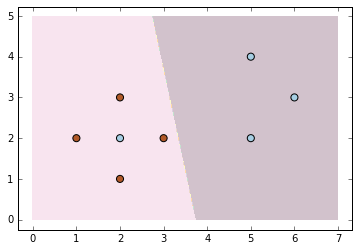

In [33]:
X2 = sp.append(seven_X,[[2,2]],axis=0)
y2 = sp.append(seven_y,-1)

model = RidgeClassifier(alpha=0)
model.fit(X2,y2)

plot_problem(X2,y2, lambda x : model.predict(x) >= 0)


Prikažite granicu između klasa te izračunajte točnost modela (možete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)).

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y2,model.predict(X2))

0.875

**Q:** Koliko iznosi točnost modela? Objasnite zašto model ne ostvaruje potpunu točnost. Je li problem u skupu podataka ili u modelu?

### (c)

Trenirajte klasifikacijski model `RidgeClassifier` na sljedećem skupu podataka (skup `seven` proširen jednim primjerom):

In [35]:
X3 = sp.append(seven_X,[[12,8]],axis=0)
y3 = sp.append(seven_y,-1)

Prikažite granicu između klasa te izračunajte točnost modela.

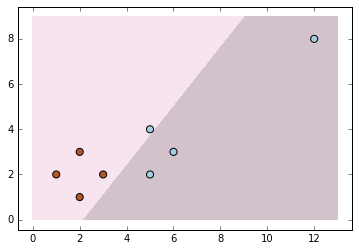

In [36]:
model = RidgeClassifier(alpha=0)
model.fit(X3,y3)
plot_problem(X3,y3, lambda x : model.predict(x) >= 0)

**Q:** Koliko iznosi točnost modela? Objasnite zašto model ne ostvaruje potpunu točnost. Je li problem u skupu podataka ili u modelu?

### 9. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan skup podataka od tri klase:

In [37]:
from sklearn.datasets import make_classification

X,y = make_classification(n_classes=3,n_redundant=0,n_clusters_per_class=1,n_features=2,n_informative=2)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

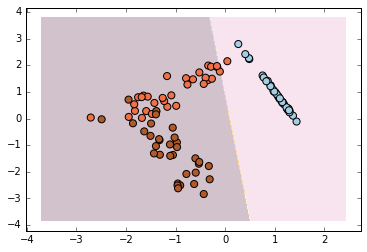

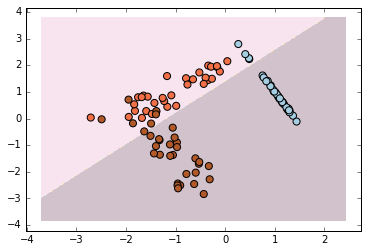

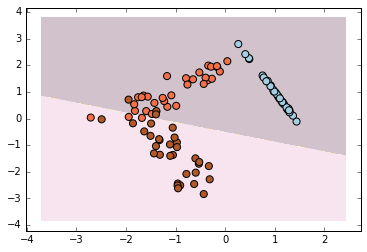

0.92
0.94


In [38]:

models = []
for klasa in range(3):
    y_ = y.copy()
    y_[y==klasa] = 1
    y_[y!=klasa] = -1
    
    model = RidgeClassifier(alpha=0)
    model.fit(X,y_)
    
    models.append(model)
    
    plot_problem(X,y, lambda x : model.predict(x) >= 0)
    plt.show()

def argmax(x):
    return sp.argmax(map(lambda a: a.predict(x),models))
   
    
yy = [ argmax(x) for x in X]

print accuracy_score(y,yy)
model = RidgeClassifier(alpha=0)
model.fit(X,y)
print accuracy_score(y,model.predict(X))

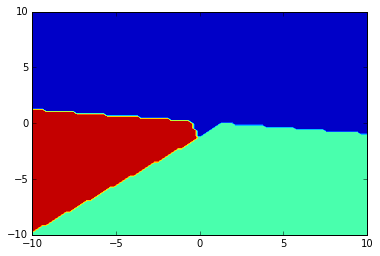

In [39]:
x1 = linspace(-10, 10,100)
x2 = linspace(-10, 10,100)
mX1, mX2 = np.meshgrid(x1, x2)

n = len(x1)
m = len(x2)
YY = sp.zeros((n,m))
for i in range(0,n):
    for j in range(0,m):
        YY[i,j] = argmax([x1[i], x2[j]])

plt.contourf(mX1, mX2, YY);

**Q4:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

### 10. Perceptron

Perceptron je implementiran klasom [`linear_model.Perceptron`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). Trenirajte perceptron na skupu `seven` iz zadatka 8a i prikažite granicu između klasa. Uvjerite se da rezultat ovisi o redoslijedu primjera u skupu za učenje (postavite `shuffle=True` i mijenjajte parametar `random_state`). Zatim trenirajte perceptron na dvama varijantima skupa `seven` iz zadataka 8b i 8c te prikažite opet granice između klasa.

**NB:** Obratite pozornost na broj iteracija algoritma (parametar `n_iter`).

(7, 2) (7,)


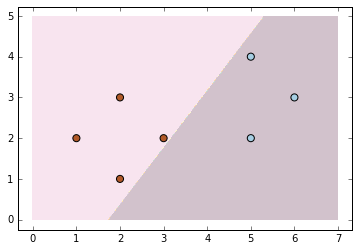

(8, 2) (8,)


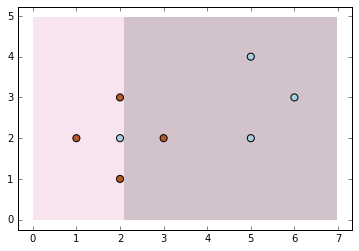

(8, 2) (8,)


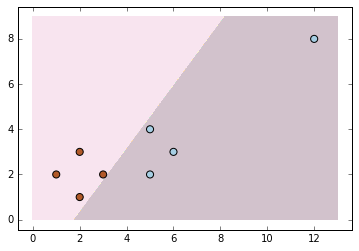

In [40]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=0, n_iter=50, shuffle=True)

for X,y in [(seven_X,seven_y),(X2,y2),(X3,y3)]:
    perceptron.fit(X, y)
    print X.shape,y.shape
    plot_problem(X, y, h=lambda x : perceptron.predict(x) >= 0)
    plt.show()


**Q:** Komentirajte razlike u rezultatima dobivenima na skupu `seven` i na dvije njegove varijante.